# Határozzuk meg numerikus adatok leíró statisztikáit

In [1]:
import numpy as np
import pandas as pd

def palmer_pingvinek_betöltése(no_missing=True):
    url = "https://raw.githubusercontent.com/"
    url += "allisonhorst/palmerpenguins/main/"
    url += "inst/extdata/penguins.csv"
    numerikus_jellemzők = [
        "bill_length_mm", "bill_depth_mm",
        "flipper_length_mm", "body_mass_g"]
    cél = ["species"]
    adatok = pd.read_csv(url)
    if no_missing:
        adatok = adatok.dropna()
    return adatok[numerikus_jellemzők + cél]
    
pingvinek = palmer_pingvinek_betöltése(no_missing=True) 

In [2]:
print(f"A pandas-verziód: {pd.__version__}")
print(f"A NumPy-verziód: {np.__version__}")

A pandas-verziód: 1.5.3
A NumPy-verziód: 1.23.5


In [3]:
print(pingvinek.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


## Mérjük a centrális tendenciát

In [4]:
print(pingvinek.mean(numeric_only=True))

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64


In [5]:
print(pingvinek.median(numeric_only=True))

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64


## Mérjük a szórásnégyzetet és a tartományt

In [6]:
print(pingvinek.std(numeric_only=True))

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64


In [7]:
print(pingvinek.max(numeric_only=True)
      - pingvinek.min(numeric_only=True))

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64


## Használjunk percentiliseket

In [8]:
print(pingvinek.select_dtypes(np.number).
      quantile([0,.25,.50,.75,1]))

      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0.00            32.1           13.1              172.0       2700.0
0.25            39.5           15.6              190.0       3550.0
0.50            44.5           17.3              197.0       4050.0
0.75            48.6           18.7              213.0       4775.0
1.00            59.6           21.5              231.0       6300.0


## Határozzuk meg a normalitás mérőszámait

In [9]:
from scipy.stats import skew, skewtest
változó = pingvinek["body_mass_g"]
f = skew(változó)
zpontszám, pérték = skewtest(változó)
print(f"Ferdeség {f:.3f} z-pontszám " \
      f"{zpontszám:.3f} p-érték {pérték:.3f}")

Ferdeség 0.470 z-pontszám 3.414 p-érték 0.001


In [10]:
from scipy.stats import kurtosis, kurtosistest
változó= pingvinek["body_mass_g"]
c = kurtosis(változó)
zpontszám, pérték = kurtosistest(változó)
print(f"Csúcsosság {c:.3f} z-pontszám {zpontszám:.3f} " \
      f"p-érték {pérték:.3f}")

Csúcsosság -0.740 z-pontszám -4.337 p-érték 0.000


# Számoljunk össze kategorikus adatokat

In [11]:
percent = [0, .25, .5, .75, 1]
kategorizált_pingvinek = pd.concat(
    [pd.qcut(pingvinek.iloc[:,0], percent, precision=1),
     pd.qcut(pingvinek.iloc[:,1], percent, precision=1),
     pd.qcut(pingvinek.iloc[:,2], percent, precision=1),
     pd.qcut(pingvinek.iloc[:,3], percent, precision=1)],
    join='outer', axis = 1)

## Ismerjük meg a gyakoriságokat

In [12]:
print(pingvinek["species"].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64


In [13]:
print(kategorizált_pingvinek['body_mass_g'].value_counts())

(2699.9, 3550.0]    86
(3550.0, 4050.0]    86
(4775.0, 6300.0]    83
(4050.0, 4775.0]    78
Name: body_mass_g, dtype: int64


In [14]:
print(kategorizált_pingvinek.describe())

       bill_length_mm bill_depth_mm flipper_length_mm       body_mass_g
count             333           333               333               333
unique              4             4                 4                 4
top      (32.0, 39.5]  (13.0, 15.6]    (171.9, 190.0]  (2699.9, 3550.0]
freq               86            85                95                86


## Készítsünk kontingenciatáblázatokat

In [15]:
print(pd.crosstab(pingvinek["species"],
                  kategorizált_pingvinek['body_mass_g']))

body_mass_g  (2699.9, 3550.0]  (3550.0, 4050.0]  (4050.0, 4775.0]  \
species                                                             
Adelie                     64                50                32   
Chinstrap                  22                35                10   
Gentoo                      0                 1                36   

body_mass_g  (4775.0, 6300.0]  
species                        
Adelie                      0  
Chinstrap                   1  
Gentoo                     82  


In [16]:
pd.crosstab(pingvinek["species"],
                  kategorizált_pingvinek['body_mass_g'])

body_mass_g,"(2699.9, 3550.0]","(3550.0, 4050.0]","(4050.0, 4775.0]","(4775.0, 6300.0]"
species,,,,
Adelie,64,50,32,0
Chinstrap,22,35,10,1
Gentoo,0,1,36,82


# Készítsünk alkalmazott vizualizációt az EDA-hoz

## Vizsgáljunk dobozdiagramokat

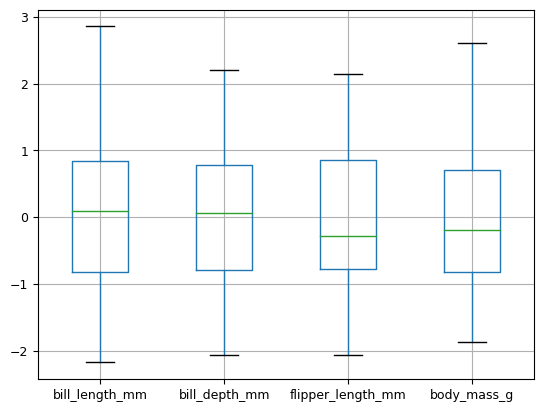

In [17]:
from sklearn.preprocessing import StandardScaler

normalizáló = StandardScaler()
numerikus_jellemzők = pingvinek.select_dtypes(
    include=['number'])
pingvinek_norm = pd.DataFrame(
    normalizáló.fit_transform(numerikus_jellemzők),
    columns=numerikus_jellemzők.columns)

dobozdiagramok = pingvinek_norm.boxplot(fontsize=9)

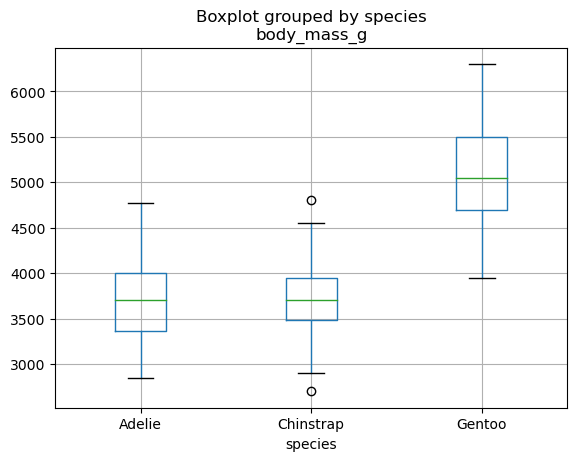

In [18]:
%matplotlib inline
import matplotlib.pyplot as dg
dobozdiagramok = pingvinek.boxplot(column='body_mass_g',
                            by="species", fontsize=10)
dg.show()

## Végezzünk t-próbákat a dobozdiagramok megjelenítése után

In [19]:
from scipy.stats import ttest_ind

csoport0 = pingvinek['species'] == 'Adelie'
csoport1 = pingvinek['species'] == 'Chinstrap'
csoport2 = pingvinek['species'] == 'Gentoo'
változó = pingvinek['body_mass_g']

print(f"vált1 {változó[csoport0].var():.3f} " \
      f"vált2 {változó[csoport1].var():03f}")

vált1 210332.428 vált2 147713.454785


In [20]:
változó = pingvinek['body_mass_g']
t, pérték = ttest_ind(változó[csoport0], változó[csoport1],
                      axis=0, equal_var=False)
print(f"t statisztika {t:.3f} p-érték {pérték:.3f}")

t statisztika -0.448 p-érték 0.655


In [21]:
from scipy.stats import f_oneway

változó = pingvinek['body_mass_g']
f, pérték = f_oneway(változó[csoport0],
                     változó[csoport1],
                     változó[csoport2])
print(f"Egyutas ANOVA F-értéke {f:.3f} p-érték "
      f"{pérték:.3f}")

Egyutas ANOVA F-értéke 341.895 p-érték 0.000


## Figyeljük meg a párhuzamos koordinátákat

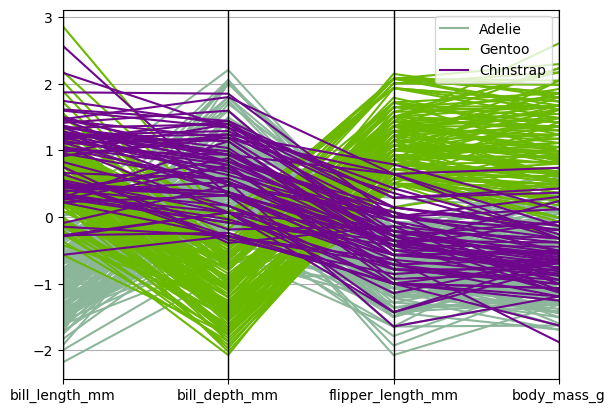

In [22]:
from pandas.plotting import parallel_coordinates

pingvinek_norm["species"] = pingvinek["species"].values
pk = parallel_coordinates(pingvinek_norm, "species")

## Ábrázoljunk grafikusan eloszlásokat

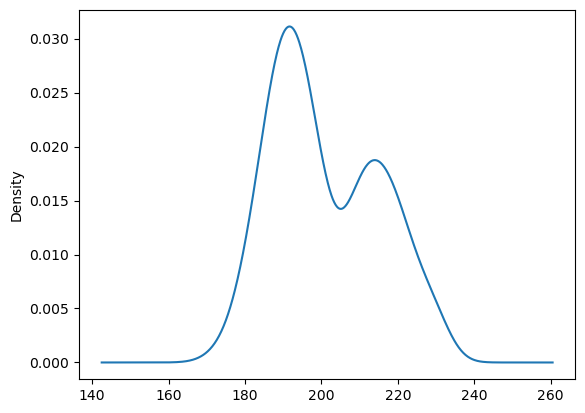

In [23]:
sűrűségdiagram = (pingvinek["flipper_length_mm"]
               .plot(kind="density"))

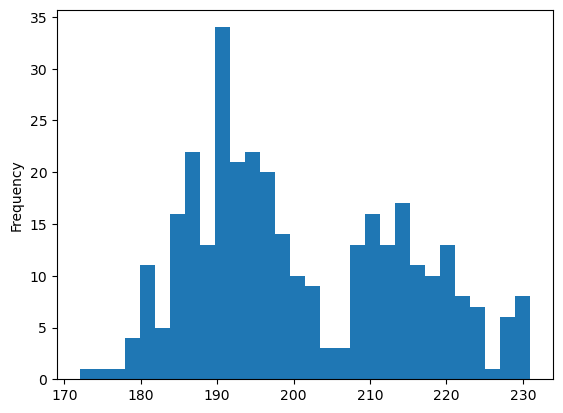

In [24]:
egy_eloszlás = (pingvinek["flipper_length_mm"]
                       .plot(kind="hist", bins=30))

## Ábrázoljunk pontdiagramokat

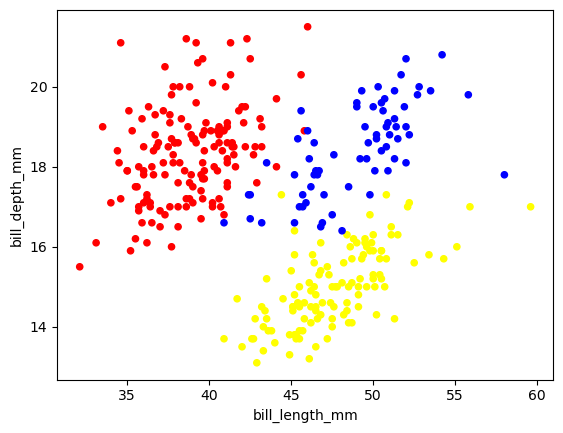

In [25]:
paletta = {'Adelie': 'red', 'Gentoo': 'yellow', 'Chinstrap':'blue'}
színek = [paletta[c] for c in pingvinek['species']]
egyszerű_pontdiagram = pingvinek.plot(
                kind='scatter', x='bill_length_mm',
                y='bill_depth_mm', c=színek)

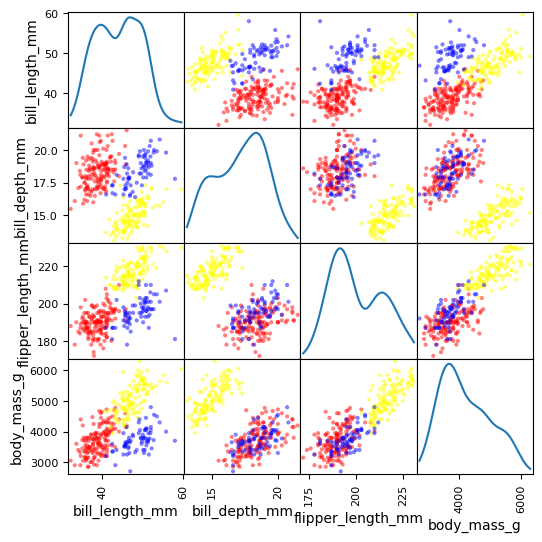

In [26]:
from pandas.plotting import scatter_matrix

paletta = paletta = {'Adelie': 'red', 'Gentoo': 'yellow',
                    'Chinstrap':'blue'}
színek = [paletta[c] for c in pingvinek['species']]
pontdiagramok_mátrixa = scatter_matrix(
    pingvinek, figsize=(6, 6),
    color=színek, diagonal='kde')

# Értsük meg a korrelációt

## Használjunk kovarianciát és korrelációt

In [27]:
pingvinek.select_dtypes(np.number).cov()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.906333,-2.462091,50.058195,2595.623304
bill_depth_mm,-2.462091,3.877888,-15.947248,-748.456122
flipper_length_mm,50.058195,-15.947248,196.441677,9852.191649
body_mass_g,2595.623304,-748.456122,9852.191649,648372.487699


In [28]:
pingvinek.select_dtypes(np.number).corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [29]:
import numpy as np

kovarianciamátrix = np.cov(pingvinek.iloc[:,:4], rowvar=0)
korrelációs_mátrix = np.corrcoef(pingvinek.iloc[:,:4],
                                 rowvar=0)

In [30]:
pingvinek.select_dtypes(np.number).corr()**2

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.052270,0.426534,0.347453
bill_depth_mm,0.052270,1.000000,0.333843,0.222799
flipper_length_mm,0.426534,0.333843,1.000000,0.762092
body_mass_g,0.347453,0.222799,0.762092,1.000000


## Használjunk nem paraméteres korrelációt

In [31]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

a = pingvinek['bill_length_mm']
b = pingvinek['bill_depth_mm']
ró_koef, ró_p = spearmanr(a, b)
r_koef, r_p = pearsonr(a, b)
print(f"Pearson r {r_koef:.3f} | "
      f"Spearman ró {ró_koef:.3f}")

Pearson r -0.229 | Spearman ró -0.214


## Vegyük számításba a khí-négyzetet táblázatoknál

In [32]:
from scipy.stats import chi2_contingency

tábla = pd.crosstab(pingvinek["species"],
                    kategorizált_pingvinek["bill_length_mm"])
khí2, p, dof, várt = chi2_contingency(tábla.values)
print(f"Khí-négyzet {khí2:.2f} p-érték {p:.3f}")

Khí-négyzet 264.02 p-érték 0.000


# Használjuk a Cramér-féle V-t

In [33]:
n = len(pingvinek)
k, r = tábla.shape
V = np.sqrt(khí2 / (n * min(k-1, r-1)))
print(f"Cramér-féle V {V:.2f}")

Cramér-féle V 0.63


# Módosítsuk az adateloszlásokat

## Készítsünk Z-pontszámos normalizálást

In [34]:
from sklearn.preprocessing import StandardScaler

normalizáló = StandardScaler()
bill_depth_mm = normalizáló.fit_transform(
    pingvinek[['bill_depth_mm']])

## Transzformáljunk más nevezetes eloszlásokra

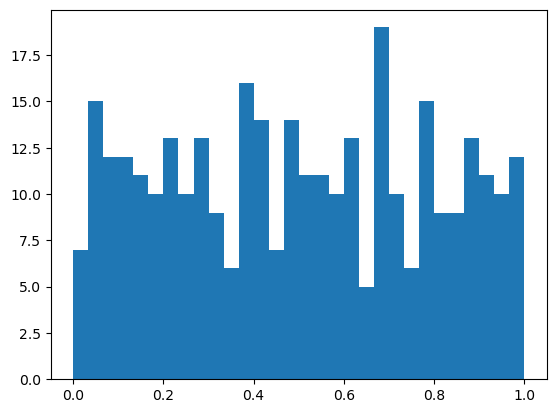

In [35]:
from sklearn.preprocessing import QuantileTransformer

egyenletes = QuantileTransformer(
    n_quantiles=30, output_distribution="uniform")
bill_depth_mm = egyenletes.fit_transform(
    pingvinek[['bill_depth_mm']])
dg.hist(bill_depth_mm, bins=30);

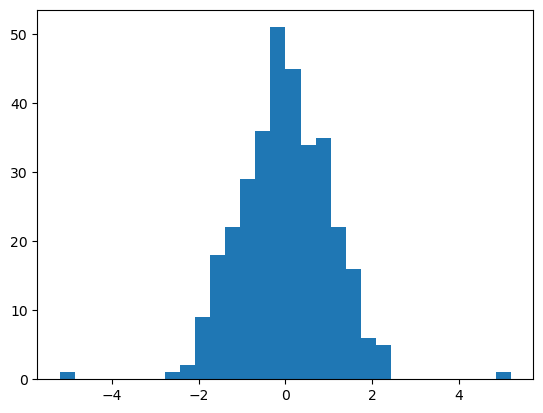

In [36]:
normális = QuantileTransformer(
    n_quantiles=30, output_distribution="normal")
bill_depth_mm = normális.fit_transform(
    pingvinek[['bill_depth_mm']])
dg.hist(bill_depth_mm, bins=30);